<a href="https://colab.research.google.com/github/yeonsu-park12/weatherwise_yeonsu-park/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 117.0 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existi

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'

## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta

print("✅ WeatherWise setup complete!\n")

✅ WeatherWise setup complete!



## 🌤️ Weather Data Functions

In [5]:
def get_weather_data(city):
    """
    Fetch weather data from wttr.in API.
    Args:
        city (str): City name.
    Returns:
        dict or None: Weather data in JSON format.
    """
    url = f"https://wttr.in/{city}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"⚠️ Error retrieving weather data: {e}")
        return None

## 📊 Visualisation Functions

In [10]:
def visualize_temperature(weather_data):
    """Display temperature chart for the next 3 days."""
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    avg_temps = [sum(int(hour['tempC']) for hour in day['hourly']) / len(day['hourly']) for day in days]

    plt.figure(figsize=(6, 4))
    plt.plot(dates, avg_temps, marker='o', linestyle='-', linewidth=2)
    plt.title("Average Temperature (Next 3 Days)")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.show()


## 🤖 Natural Language Processing

In [16]:
def parse_weather_question(question, city):
    """
    Use simple NLP to interpret user questions.
    Example: "Is it good for running tomorrow?"
    """
    data = get_weather_data(city)
    if not data:
        print("⚠️ No data retrieved.")
        return

    # Recognize date (today, tomorrow, after-tomorrow)
    time_match = re.search(r"(today|tomorrow|day after tomorrow)", question, re.IGNORECASE)
    time_text = time_match.group(1).lower() if time_match else "today"

    if time_text == "tomorrow":
        target_day = 1
    elif "after" in time_text:
        target_day = 2
    else:
        target_day = 0

    # Recognize activity
    activity_match = re.search(r"(run|walk|hike|swim|tennis|cycling|study|read|cook)", question, re.IGNORECASE)
    activity = activity_match.group(1).lower() if activity_match else "activity"

    # Fetch weather data
    target = data['weather'][target_day]
    desc = target['hourly'][4]['weatherDesc'][0]['value']
    avg_temp = sum(int(h['tempC']) for h in target['hourly']) / len(target['hourly'])

    # Generate suggestion
    suggestion = suggest_activity(avg_temp)
    print(f"\n📅 {time_text.capitalize()} in {city}: {desc}, avg {avg_temp:.1f}°C")
    print(f"🏃 Activity Suggestion for {activity}: {suggestion}")

# Activity Suggestion Function
def suggest_activity(temp):
    """Suggest activity based on temperature."""
    if temp >= 25:
        return "🌞 Great day for outdoor activities!"
    elif temp >= 15:
        return "🌤 Perfect weather for a walk."
    else:
        return "🌧 Better to stay cozy indoors."

## 🧭 User Interface

In [13]:
def main():
    print("=" * 50)
    print("🌦 WELCOME TO WEATHERWISE 🌦")
    print("=" * 50)

    city = input("Enter your city: ")
    data = get_weather_data(city)
    if not data:
        return

    current_temp = data['current_condition'][0]['temp_C']
    print(f"\nCurrent temperature in {city}: {current_temp}°C")
    print(suggest_activity(int(current_temp)))

    while True:
        print("\nMenu:")
        print("1. View 3-day temperature chart")
        print("2. Ask an AI weather question (NLP)")
        print("3. Exit")

        choice = input("Select an option: ")

        if choice == '1':
            visualize_temperature(data)
        elif choice == '2':
            q = input("Ask a question about the weather: ")
            parse_weather_question(q, city)
        elif choice == '3':
            print("Goodbye! Stay weather-wise 🌤")
            break
        else:
            print("❌ Invalid choice, try again.")

## 🧩 Main Application Logic

🌦 WELCOME TO WEATHERWISE 🌦
Enter your city: Perth

Current temperature in Perth: 13°C
🌧 Better to stay cozy indoors.

Menu:
1. View 3-day temperature chart
2. Ask an AI weather question (NLP)
3. Exit
Select an option: 1


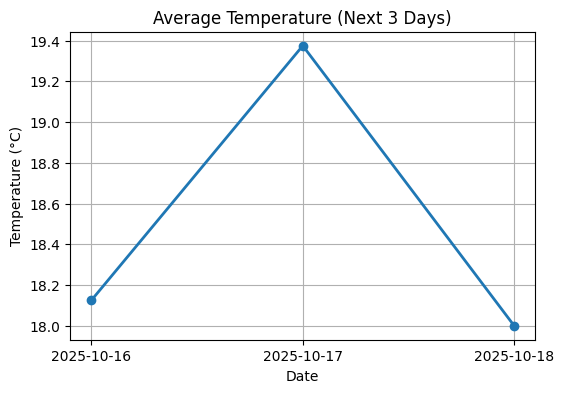


Menu:
1. View 3-day temperature chart
2. Ask an AI weather question (NLP)
3. Exit
Select an option: 2
Ask a question about the weather: Is it good for running tomorrow?

📅 Tomorrow in Perth: Sunny, avg 19.4°C
🏃 Activity Suggestion for run: 🌤 Perfect weather for a walk.

Menu:
1. View 3-day temperature chart
2. Ask an AI weather question (NLP)
3. Exit
Select an option: 2
Ask a question about the weather: Can I walk today?

📅 Today in Perth: Sunny, avg 18.1°C
🏃 Activity Suggestion for walk: 🌤 Perfect weather for a walk.

Menu:
1. View 3-day temperature chart
2. Ask an AI weather question (NLP)
3. Exit
Select an option: 3
Goodbye! Stay weather-wise 🌤


In [14]:
if __name__ == "__main__":
    main()

## 🧪 Testing and Examples

In [15]:
# Example prompt:
# - City: Perth
# - Question: Is it good for running tomorrow?

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.